In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [2]:
train_data = pd.read_excel(r"C:\Users\HP\Downloads\Data_Train (1).xlsx")

In [3]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
train_data.Duration.value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
31h 30m      1
30h 25m      1
42h 5m       1
4h 10m       1
47h 40m      1
Name: Duration, Length: 368, dtype: int64

In [6]:
train_data.shape

(10683, 11)

In [7]:
train_data.dropna(inplace=True)

In [8]:
train_data.shape

(10682, 11)

In [9]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

# EDA 

In [10]:
train_data['Journey_Day'] = pd.to_datetime(train_data['Date_of_Journey'], format='%d/%m/%Y').dt.day

In [11]:
train_data['Journey_Month'] = pd.to_datetime(train_data['Date_of_Journey'], format='%d/%m/%Y').dt.month

In [12]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [13]:
train_data.drop(['Date_of_Journey'], axis=1, inplace=True)

In [14]:
# Extracting hours
train_data['Dep_hour'] = pd.to_datetime(train_data.Dep_Time).dt.hour

# Extracting minutes
train_data['Dep_minutes'] = pd.to_datetime(train_data.Dep_Time).dt.minute

# Dropping Dep time column
train_data.drop(['Dep_Time'], axis=1, inplace=True)

In [15]:
train_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_hour,Dep_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [16]:
# Extracting hours
train_data['Arrival_hour'] = pd.to_datetime(train_data.Arrival_Time	).dt.hour

# Extracting minutes
train_data['Arrival_minutes'] = pd.to_datetime(train_data.Arrival_Time	).dt.minute

# Dropping Arrival time column
train_data.drop(['Arrival_Time'], axis=1, inplace=True)

In [17]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [18]:
# duration = list(train_data.Duration)

# for i in range(len(duration)):
#     if len(duration[i].split()) != 2:         # check if duration contains only hours or min
#         if 'h' in duration[i]:
#             duration[i] = duration[i].strip() + '0m'           # Adds 0 minutes
#         else:
#             duration[i] = '0h' + duration[i]                   # Adds 0 hours

# duration_hours = []
# duration_mins = []
# for i in range(len(duration)):
#     duration_hours.append(int(duration[i].split(sep='h')[0]))
#     try:
#         duration_mins.append(int(duration[i].split(sep='m')[0].split()[-1]))
#     except ValueError:
#         duration_mins.append(int(0))

In [19]:
# train_data['Duration_hours'] = duration_hours
# train_data['Duration_mins'] = duration_mins

In [20]:
def duration_to_mins(string_element):
    """ Here we extract Hours and minutes from string of pattern '2h 50m'and convert to minutes (int object type).
    """
    dur_mins = 0 # initiate duration in mins as zero
    for substring in string_element.split() : # Here we split string at spaces anditerate over each element of the list
        if 'h' in substring:
            h = int(substring[:-1]) * 60 # We convert hours to mins by multiplying with 60.
            dur_mins += h # addtion of mins to duration
        if 'm' in substring:
             m = int(substring[:-1]) # we extract mins from the string
             dur_mins += m # addtion of mins to duration
    return dur_mins

In [21]:
train_data["Duration_in_mins"] = train_data.Duration.apply(duration_to_mins) # doing element wise operation on the whole column.
train_data["Duration_in_mins"]

0         170
1         445
2        1140
3         325
4         285
         ... 
10678     150
10679     155
10680     180
10681     160
10682     500
Name: Duration_in_mins, Length: 10682, dtype: int64

In [22]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes,Duration_in_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30,325
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35,285


In [23]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes,Duration_in_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30,325
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35,285


In [24]:
train_data.drop(['Duration'], axis=1, inplace=True)

In [25]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes,Duration_in_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,325
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,285


# Handling categotical data

In [26]:
train_data.Airline.value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

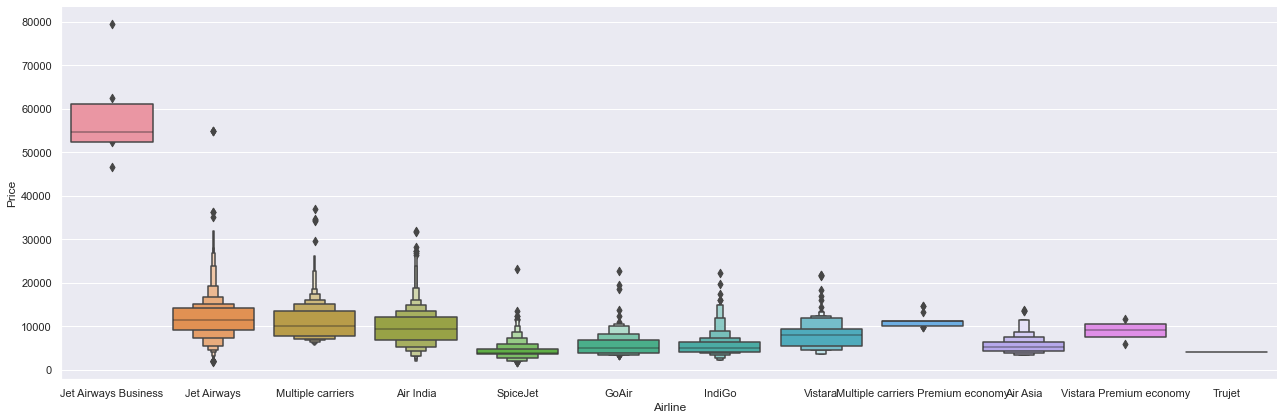

In [27]:
# Airline vs Price

sns.catplot(y= 'Price', x= 'Airline', data= train_data.sort_values('Price', ascending=False), kind='boxen', height=6, aspect=3)
plt.show()

In [28]:
Airline = train_data[['Airline']]
Airline = pd.get_dummies(Airline, drop_first=True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [29]:
train_data.Source.value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

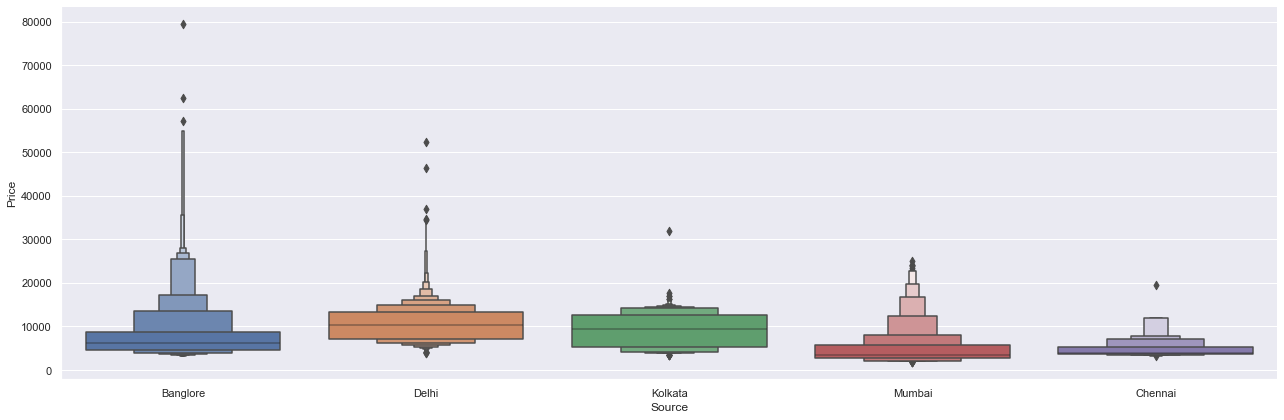

In [30]:
# Source vs Price

sns.catplot(y= 'Price', x= 'Source', data= train_data.sort_values('Price', ascending=False), kind='boxen', height=6, aspect=3)
plt.show()

In [31]:
Source = train_data[['Source']]
Source = pd.get_dummies(Source, drop_first=True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [32]:
train_data.Destination.value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [33]:
Destination = train_data[['Destination']]
Destination = pd.get_dummies(Destination, drop_first=True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [34]:
train_data.Route

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [35]:
train_data.drop(['Route', 'Additional_Info'], axis=1, inplace=True)

In [36]:
train_data.Total_Stops.value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [37]:
train_data.replace({'non-stop': 0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4}, inplace=True)

In [38]:
train_data = pd.concat([train_data, Airline, Source, Destination], axis=1)

In [39]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Dep_hour,Dep_minutes,Arrival_hour,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,...,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,...,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,...,0,0,0,0,0,0,0,0,0,1


In [40]:
train_data.drop(['Airline', 'Source', 'Destination'], axis=1, inplace=True)

In [41]:
train_data.shape

(10682, 29)

# Test Data 

In [42]:
test_data = pd.read_excel(r"C:\Users\HP\Downloads\Test_set (1).xlsx")

In [43]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [44]:
# Preprocessing

print('Test data info')
print('#'*50)
print(test_data.info())

print('NULL values :')
print('#'*50)
test_data.dropna(inplace=True)
print(test_data.isnull().sum())

# EDA

test_data['Journey_Day'] = pd.to_datetime(test_data['Date_of_Journey'], format='%d/%m/%Y').dt.day
test_data['Journey_Month'] = pd.to_datetime(test_data['Date_of_Journey'], format='%d/%m/%Y').dt.month

test_data.drop(['Date_of_Journey'], axis=1, inplace=True)

# Extracting hours
test_data['Arrival_hour'] = pd.to_datetime(test_data.Arrival_Time).dt.hour

# Extracting minutes
test_data['Arrival_minutes'] = pd.to_datetime(test_data.Arrival_Time).dt.minute

# Dropping Arrival time column
test_data.drop(['Arrival_Time'], axis=1, inplace=True)

# duration = list(test_data.Duration)

# for i in range(len(duration)):
#     if len(duration[i].split()) != 2:         # check if duration contains only hours or min
#         if 'h' in duration[i]:
#             duration[i] = duration[i].strip() + '0m'           # Adds 0 minutes
#         else:
#             duration[i] = '0h' + duration[i]                   # Adds 0 hours
# duration_hours = []
# duration_mins = []
# for i in range(len(duration)):
#     duration_hours.append(int(duration[i].split(sep='h')[0]))
#     try:
#         duration_mins.append(int(duration[i].split(sep='m')[0].split()[-1]))
#     except ValueError:
#         duration_mins.append(int(0))


# test_data['Duration_hours'] = duration_hours
# test_data['Duration_mins'] = duration_mins
test_data["Duration_in_mins"] = test_data.Duration.apply(duration_to_mins) # doing element wise operation on the whole column.

test_data.drop(['Duration'], axis=1, inplace=True)


# Handling categotical data

Airline = test_data[['Airline']]
Airline = pd.get_dummies(Airline, drop_first=True)

Source = test_data[['Source']]
Source = pd.get_dummies(Source, drop_first=True)

Destination = test_data[['Destination']]
Destination = pd.get_dummies(Destination, drop_first=True)


test_data.drop(['Route', 'Additional_Info'], axis=1, inplace=True)

test_data.replace({'non-stop': 0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4}, inplace=True)

test_data = pd.concat([test_data, Airline, Source, Destination], axis=1)

test_data.drop(['Airline', 'Source', 'Destination'], axis=1, inplace=True)

print(test_data.shape)

Test data info
##################################################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB
None
NULL values :
##################################################
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_

In [45]:
# Extracting hours
test_data['Dep_hour'] = pd.to_datetime(test_data.Dep_Time).dt.hour

# Extracting minutes
test_data['Dep_minutes'] = pd.to_datetime(test_data.Dep_Time).dt.minute

# Dropping Dep time column
test_data.drop(['Dep_Time'], axis=1, inplace=True)

In [46]:
test_data.head()

,Total_Stops,Journey_Day,Journey_Month,Arrival_hour,Arrival_minutes,Duration_in_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,...,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Dep_hour,Dep_minutes
0,1,6,6,4,25,655,0,0,0,1,...,1,0,0,1,0,0,0,0,17,30
1,1,12,5,10,20,240,0,0,1,0,...,0,1,0,0,0,0,0,0,6,20
2,1,21,5,19,0,1425,0,0,0,1,...,1,0,0,1,0,0,0,0,19,15
3,1,21,5,21,0,780,0,0,0,0,...,1,0,0,1,0,0,0,0,8,0
4,0,24,6,2,45,170,0,0,0,0,...,0,0,0,0,1,0,0,0,23,55


# Feature Selection

In [47]:
train_data.columns

Index(['Total_Stops', 'Price', 'Journey_Day', 'Journey_Month', 'Dep_hour',
       'Dep_minutes', 'Arrival_hour', 'Arrival_minutes', 'Duration_in_mins',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [48]:

X = train_data.loc[:, ['Total_Stops', 'Journey_Day', 'Journey_Month', 'Dep_hour',
       'Dep_minutes', 'Arrival_hour', 'Arrival_minutes', 'Duration_in_mins', 
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]

In [49]:
X.head()

,Total_Stops,Journey_Day,Journey_Month,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes,Duration_in_mins,Airline_Air India,Airline_GoAir,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,170,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,445,1,0,...,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,1140,0,0,...,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,325,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,285,0,0,...,0,0,0,0,0,0,0,0,0,1


In [50]:
y = train_data.iloc[:, 1]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

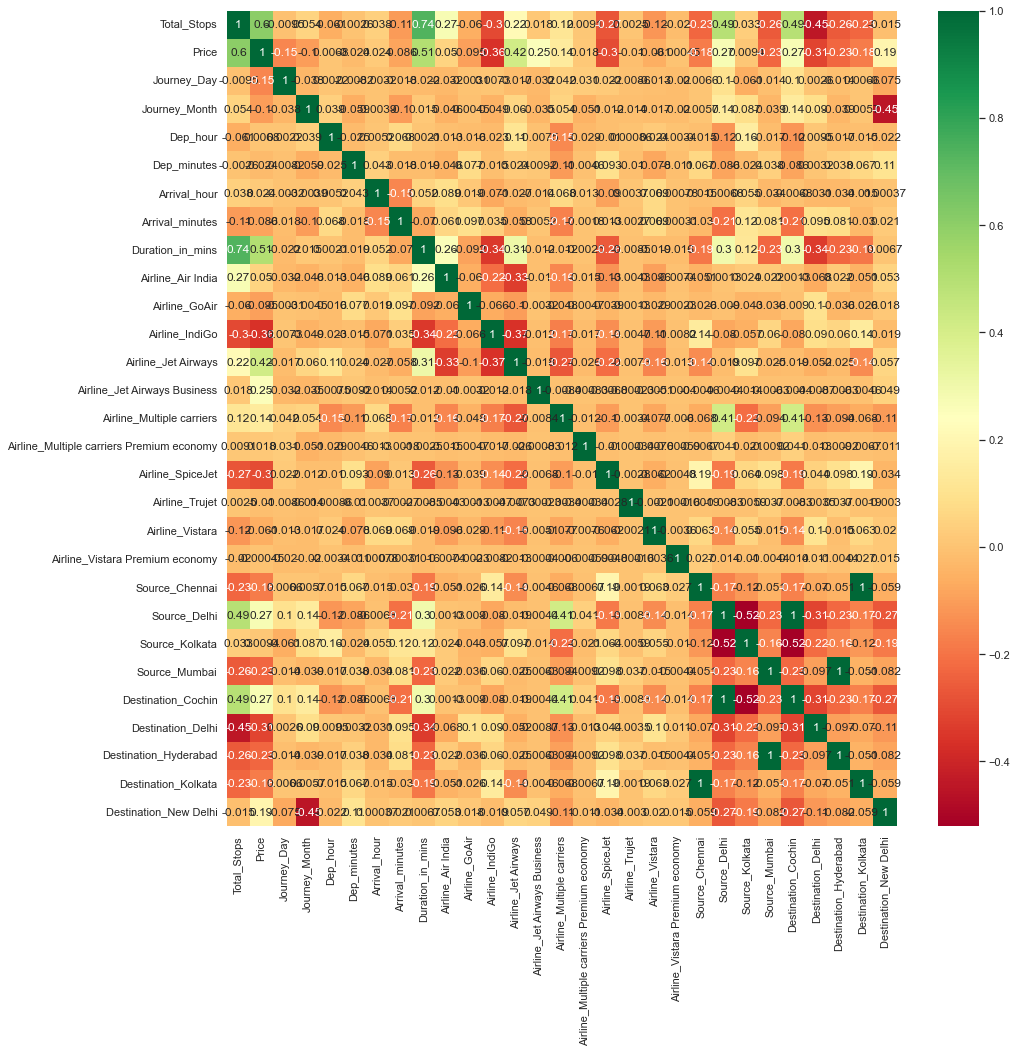

In [51]:
# Heatmap

plt.figure(figsize=(15, 15))
sns.heatmap(train_data.corr(), annot=True, cmap='RdYlGn')

plt.show()


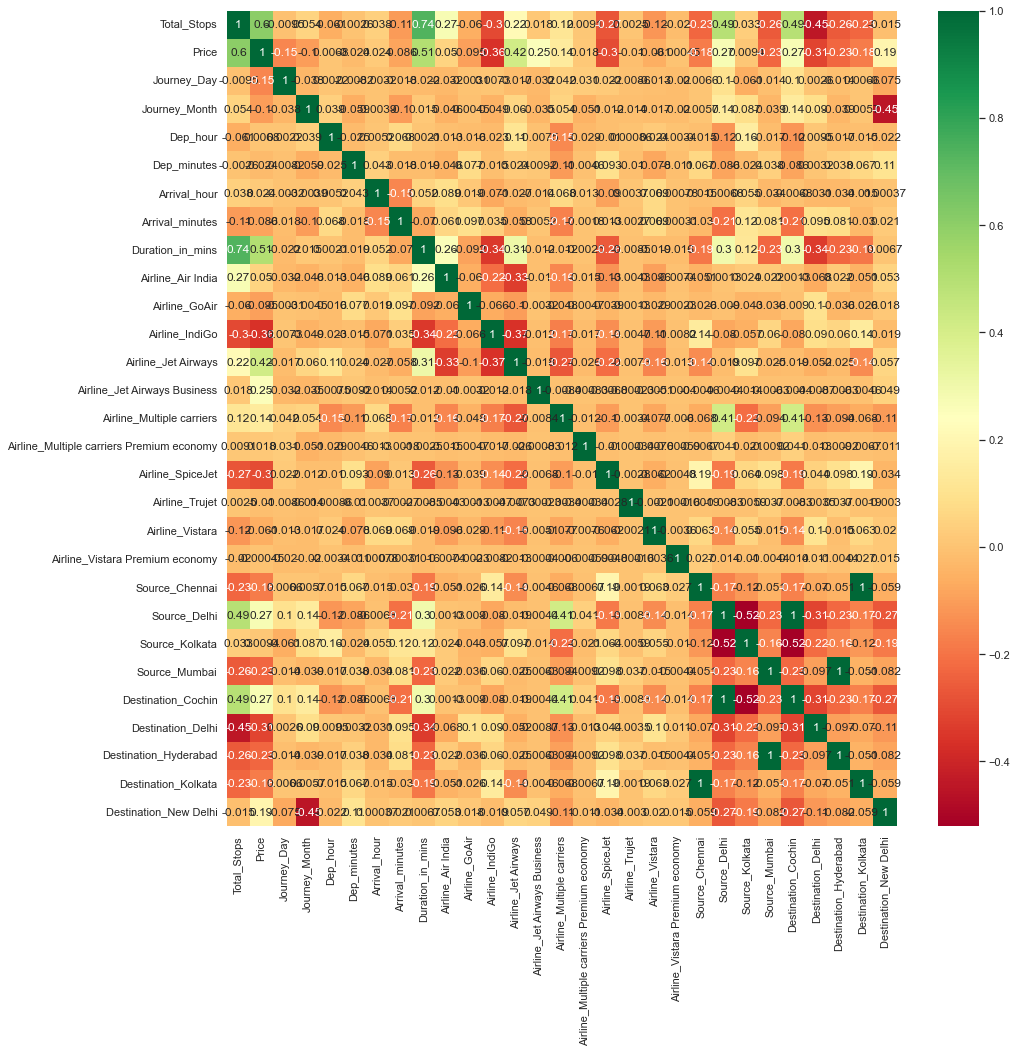

In [52]:
# Heatmap

plt.figure(figsize=(15, 15))
sns.heatmap(train_data.corr(), annot=True, cmap='RdYlGn')

plt.show()

In [53]:
# important feature using ExtraTreeRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [54]:
print(selection.feature_importances_)


[2.51821887e-01 1.44358896e-01 5.34171316e-02 2.64749014e-02
 2.51778567e-02 2.95368089e-02 2.19786960e-02 9.89136396e-02
 1.02280011e-02 1.79274292e-03 1.76967280e-02 1.41494569e-01
 6.75677081e-02 1.82539385e-02 8.62681112e-04 3.57712888e-03
 1.01502750e-04 5.26959447e-03 7.56406953e-05 5.31338430e-04
 1.51040861e-02 3.02489225e-03 6.99388762e-03 9.17126578e-03
 1.52968872e-02 6.09731905e-03 3.57138929e-04 2.48231322e-02]


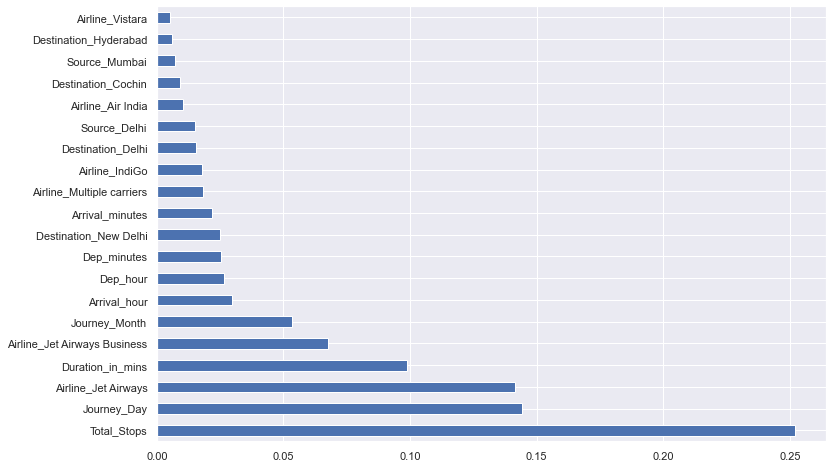

In [55]:
plt.figure(figsize=(12, 8))
feat = pd.Series(selection.feature_importances_, index=X.columns)
feat.nlargest(20).plot(kind= 'barh')
plt.show()

# Building Model using Fandom Forest

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [57]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [58]:
y_pred = reg_rf.predict(X_test)

In [59]:
reg_rf.score(X_train, y_train)

0.9535725312821465

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


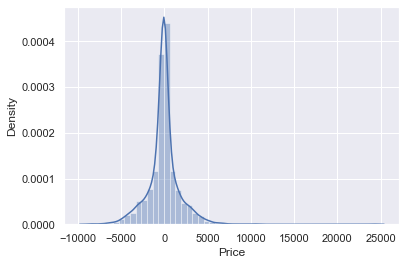

In [60]:
sns.distplot(y_test-y_pred)
plt.show()

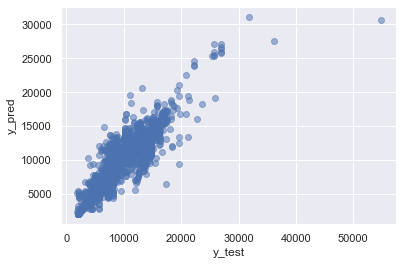

In [61]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

In [62]:
from sklearn import metrics

In [63]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1155.2050286181218
MSE: 3553793.957441991
RMSE: 1885.150911052479


In [64]:
print('R2:', metrics.r2_score(y_test, y_pred))

R2: 0.8193072432145572


In [65]:
# HyperParameter Tuning

In [66]:
from sklearn.model_selection import RandomizedSearchCV

In [67]:
# Number of trees in RF
n_estimators = [int(x) for x in np.linspace(start=100, stop=1200, num=12)]
# Number of features to consider
max_features = ['auto', 'sqrt']
# Max level in tree
max_depth = [int(x) for x in np.linspace(5, 30, num=6)]
# Min sample split
min_samples_split = [2, 5, 10, 15, 100]
# Min sample in leaf node
min_samples_leaf = [1, 2, 5, 10]

In [68]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [71]:
rf_random = RandomizedSearchCV(estimator=reg_rf, param_distributions=random_grid, scoring='neg_mean_squared_error', n_iter=10, cv=5, verbose=2, random_state=42, n_jobs=1)

In [72]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   7.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   6.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   6.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   6.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   7.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  10.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  11.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   5.5s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   6.0s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   6.0s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   5.8s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   6.3s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=  10.2s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=  10.3s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=  10.5s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=  14.2s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=  10.8s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=  15.6s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=  15.4s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=  15.6s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=  15.4s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=  14.9s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=  16.8s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=  19.2s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=  18.6s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=  18.5s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=  18.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   5.7s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   5.3s
[CV] END max_depth=5, max_feat

C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=  19.4s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=  19.3s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=  19.6s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=  19.5s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=  19.2s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [73]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [74]:
prediction = rf_random.predict(X_test)

<Figure size 576x576 with 0 Axes>

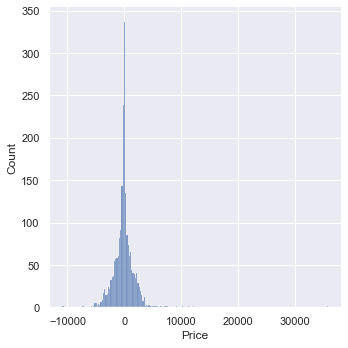

In [75]:
plt.figure(figsize=(8, 8))
sns.displot(y_test-prediction)
plt.show()

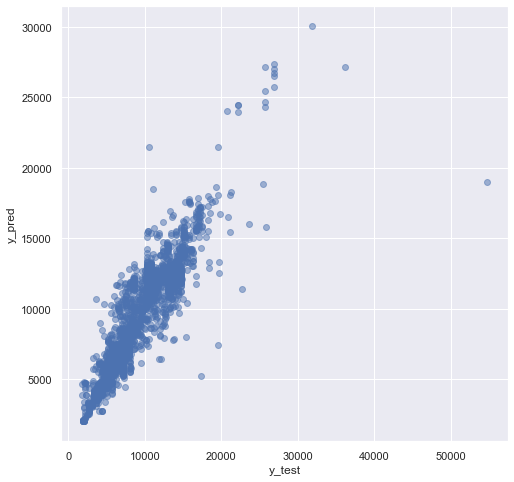

In [76]:
plt.figure(figsize=(8, 8))
plt.scatter(y_test, prediction, alpha=0.5)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

In [77]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))
print('R2:', metrics.r2_score(y_test, prediction))

MAE: 1135.9798774661592
MSE: 3455568.9522495433
RMSE: 1858.9160691783648
R2: 0.824301496450967


# Saving model for later use

In [78]:
import pickle

file = open('flightModel.pkl', 'wb')

pickle.dump(rf_random, file)

In [79]:
model = open('flightModel.pkl', 'rb')
forest = pickle.load(model)

In [80]:
y_prediction = forest.predict(X_test)

In [81]:
metrics.r2_score(y_test, y_prediction)

0.824301496450967